# **Orinson Technologies Internship-Task-1- 26/08/2024**




**Develop a model for Object Detection in Images.Focus on accurately detecting and classifying objects and ensuring the model performs well across different scenarios.**

**References:**


1.   https://analyticsindiamag.com/ai-mysteries/a-tutorial-on-building-custom-object-detection-models-using-detecto/
2.   https://towardsdatascience.com/build-a-custom-trained-object-detection-model-with-5-lines-of-code-713ba7f6c0fb
3. https://github.com/alankbi/detecto/blob/master/docs/_static/dog_dataset.zip


**Tech Stack Used:**


1.   Google Colab
2.   Detecto
3.   Matplotlib
4.   Torchvision



## Initializing

In [ ]:
!pip3 install detecto

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# change working directory to the dataset folder in drive
import os
os.chdir('/content/drive/MyDrive/Orinson_dataset/dog_dataset')

In [ ]:
!ls

images	__MACOSX  train.csv  train_labels  val.csv  val_labels


In [ ]:
!ls images

n02085620_10074.jpg  n02085620_2973.jpg  n02085620_5927.jpg  n02099601_2495.jpg  n02099601_5857.jpg
n02085620_10131.jpg  n02085620_2981.jpg  n02085620_6295.jpg  n02099601_2536.jpg  n02099601_5876.jpg
n02085620_10621.jpg  n02085620_3006.jpg  n02085620_6399.jpg  n02099601_2663.jpg  n02099601_5893.jpg
n02085620_1073.jpg   n02085620_3033.jpg  n02085620_6931.jpg  n02099601_2688.jpg  n02099601_5.jpg
n02085620_10976.jpg  n02085620_3045.jpg  n02085620_712.jpg   n02099601_2691.jpg  n02099601_6099.jpg
n02085620_11140.jpg  n02085620_3093.jpg  n02085620_7292.jpg  n02099601_2796.jpg  n02099601_6105.jpg
n02085620_11238.jpg  n02085620_3110.jpg  n02085620_730.jpg   n02099601_280.jpg	 n02099601_6139.jpg
n02085620_11258.jpg  n02085620_3208.jpg  n02085620_735.jpg   n02099601_281.jpg	 n02099601_6194.jpg
n02085620_11337.jpg  n02085620_326.jpg	 n02085620_7436.jpg  n02099601_286.jpg	 n02099601_6233.jpg
n02085620_11477.jpg  n02085620_3402.jpg  n02085620_7440.jpg  n02099601_2980.jpg  n02099601_6318.jpg
n020856

In [ ]:
!ls train_labels

n02085620_10074.xml  n02085620_2937.xml  n02085620_6931.xml  n02099601_2688.xml  n02099601_5764.xml
n02085620_10131.xml  n02085620_2973.xml  n02085620_7292.xml  n02099601_2691.xml  n02099601_5857.xml
n02085620_10621.xml  n02085620_2981.xml  n02085620_735.xml   n02099601_2796.xml  n02099601_5876.xml
n02085620_1073.xml   n02085620_3006.xml  n02085620_7436.xml  n02099601_286.xml	 n02099601_5.xml
n02085620_10976.xml  n02085620_3033.xml  n02085620_7613.xml  n02099601_2994.xml  n02099601_6099.xml
n02085620_11238.xml  n02085620_3045.xml  n02085620_7700.xml  n02099601_3004.xml  n02099601_6105.xml
n02085620_11258.xml  n02085620_3110.xml  n02085620_7.xml     n02099601_3007.xml  n02099601_6139.xml
n02085620_11477.xml  n02085620_3208.xml  n02085620_806.xml   n02099601_308.xml	 n02099601_6194.xml
n02085620_1152.xml   n02085620_326.xml	 n02085620_8420.xml  n02099601_3097.xml  n02099601_6233.xml
n02085620_11818.xml  n02085620_3402.xml  n02085620_8491.xml  n02099601_3111.xml  n02099601_6318.xml
n02085

In [ ]:
!ls val_labels

n02085620_11140.xml  n02085620_3409.xml  n02085620_4998.xml  n02099601_2358.xml  n02099601_6820.xml
n02085620_11337.xml  n02085620_3423.xml  n02085620_574.xml   n02099601_2359.xml  n02099601_7019.xml
n02085620_11696.xml  n02085620_3485.xml  n02085620_6399.xml  n02099601_2422.xml  n02099601_704.xml
n02085620_1205.xml   n02085620_3488.xml  n02085620_712.xml   n02099601_280.xml	 n02099601_7119.xml
n02085620_12334.xml  n02085620_3681.xml  n02085620_730.xml   n02099601_281.xml	 n02099601_7123.xml
n02085620_1235.xml   n02085620_368.xml	 n02085620_7440.xml  n02099601_2980.xml  n02099601_7304.xml
n02085620_1271.xml   n02085620_3763.xml  n02085620_7738.xml  n02099601_304.xml	 n02099601_7312.xml
n02085620_13383.xml  n02085620_3826.xml  n02085620_8611.xml  n02099601_3073.xml  n02099601_7437.xml
n02085620_1346.xml   n02085620_382.xml	 n02085620_9414.xml  n02099601_3414.xml  n02099601_7588.xml
n02085620_14252.xml  n02085620_3875.xml  n02099601_10.xml    n02099601_345.xml	 n02099601_7780.xml
n020856

##Converting XML files to CSV Files


In [ ]:
# converting XML files to CSV Files
import detecto
from detecto import utils, visualize
detecto.utils.xml_to_csv('train_labels','train.csv')
detecto.utils.xml_to_csv('val_labels', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,n02099601_10.jpg,500,334,golden_retriever,24,7,499,329,0
1,n02099601_3414.jpg,400,329,golden_retriever,41,26,375,305,1
2,n02085620_712.jpg,500,375,Chihuahua,98,61,349,325,2
3,n02099601_5893.jpg,500,375,golden_retriever,138,94,353,314,3
4,n02099601_280.jpg,644,559,golden_retriever,39,22,586,556,4
...,...,...,...,...,...,...,...,...,...
75,n02099601_1580.jpg,500,349,golden_retriever,22,94,346,348,70
76,n02085620_1271.jpg,360,351,Chihuahua,19,3,324,350,71
77,n02099601_9518.jpg,333,500,golden_retriever,25,42,331,498,72
78,n02085620_2208.jpg,500,375,Chihuahua,178,144,231,249,73


## Displaying a sample image

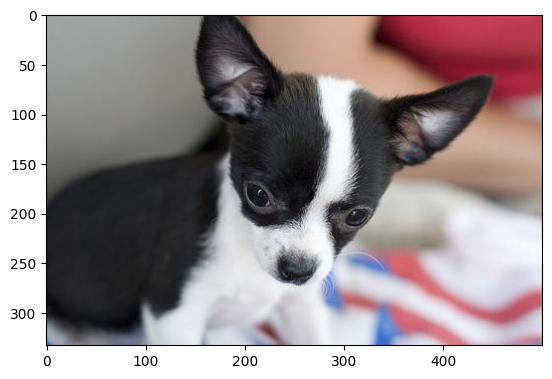

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread('/content/drive/MyDrive/Orinson_dataset/dog_dataset/images/n02085620_3826.jpg')
plt.imshow(image)
plt.show()

## Applying Transformations to the image

In [ ]:
from torchvision import transforms
from detecto import core

# Define a series of transformations to apply to the images

transform_img = transforms.Compose([transforms.ToPILImage(),
                                    # Convert the image to PIL Image format
                                    transforms.Resize(800),
                                    # Resize the image to 800 pixels
                                    transforms.RandomHorizontalFlip(0.5),
                                    # Randomly flip the image horizontally with a probability of 0.5
                                    transforms.ToTensor(),
                                    # Convert the image to a tensor
                                    utils.normalize_transform(),
                                    # Normalize the image (assuming utils.normalize_transform() is defined elsewhere)
                                    ])

In [ ]:
# Transform the image and combine and label the train images
dataset = detecto.core.Dataset('train.csv', 'images/', transform=transform_img)

/usr/local/lib/python3.10/dist-packages/detecto/core.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boxes = torch.tensor(boxes).view(-1, 4)


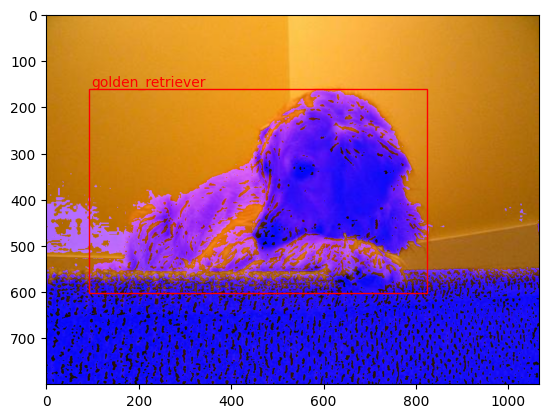

In [ ]:
# Visualizing one of the images
from detecto import visualize
image, information = dataset[50]
detecto.visualize.show_labeled_image(image, information['boxes'], information['labels'])


## Fitting the data





In [ ]:
# To fit the data into the model we are required to instantiate an object as our loader that can hold the data
dataloader = detecto.core.DataLoader(dataset)
dataloader


In [ ]:
# We will feed the data loader instance to the image classifier
validation_data = detecto.core.Dataset('val.csv', 'images/')


In [ ]:
# Now we are required to make the model know what are the categories we have in the data. We can do this while instantiating the model
categories = ['Chihuahua', 'golden_retriever']
classifier = core.Model(categories)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 65.8MB/s]


In [ ]:
#Now we are ready to fit this model into our training data and validation data.
history = classifier.fit(dataloader, validation_data, epochs = 20, verbose = True)


Epoch 1 of 20
Begin iterating over training dataset


  0%|          | 0/227 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/detecto/core.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boxes = torch.tensor(boxes).view(-1, 4)
100%|██████████| 227/227 [03:20<00:00,  1.13it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:59<00:00,  1.26it/s]


Loss: 0.19883089919885
Epoch 2 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:58<00:00,  3.86it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.29it/s]


Loss: 0.1694660006960233
Epoch 3 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.94it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.24it/s]


Loss: 0.1575687841574351
Epoch 4 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.27it/s]


Loss: 0.12779942845304806
Epoch 5 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.97it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.33it/s]


Loss: 0.12813993190725645
Epoch 6 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.97it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:10<00:00,  7.37it/s]


Loss: 0.12662884165843327
Epoch 7 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:58<00:00,  3.90it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.18it/s]


Loss: 0.1252195550998052
Epoch 8 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:59<00:00,  3.83it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  7.74it/s]


Loss: 0.12355980942646662
Epoch 9 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.94it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.24it/s]


Loss: 0.12348514477411907
Epoch 10 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.25it/s]


Loss: 0.12505911648273468
Epoch 11 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:58<00:00,  3.85it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.23it/s]


Loss: 0.12370853717128436
Epoch 12 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:58<00:00,  3.85it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.17it/s]


Loss: 0.12430403312047322
Epoch 13 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.29it/s]


Loss: 0.12341701567173004
Epoch 14 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.29it/s]


Loss: 0.12401261910796166
Epoch 15 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.97it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.26it/s]


Loss: 0.12394538491964341
Epoch 16 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:58<00:00,  3.90it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  7.94it/s]


Loss: 0.12405701061089834
Epoch 17 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.30it/s]


Loss: 0.12350575298070908
Epoch 18 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:09<00:00,  8.31it/s]


Loss: 0.1251986893514792
Epoch 19 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.96it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:08<00:00,  8.41it/s]


Loss: 0.12392528225978215
Epoch 20 of 20
Begin iterating over training dataset


100%|██████████| 227/227 [00:57<00:00,  3.97it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:08<00:00,  8.44it/s]

Loss: 0.1247673337161541


## Plotting losses

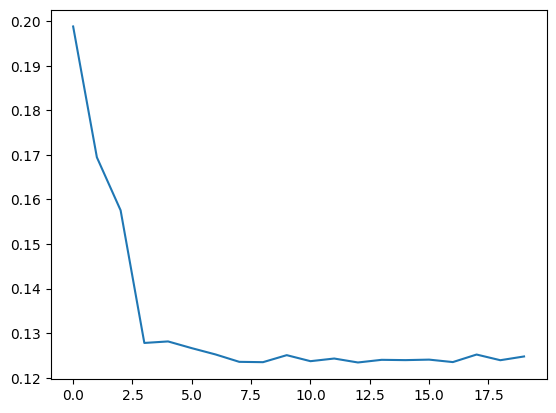

In [ ]:
#Plot losses from the model
plt.plot(history)


## Displaying some of the images

In [ ]:
# Displaying some of the images

images = []
for i in range(0,36,3):
  image,_ = validation_data[i]
  images.append(image)
image.shape


torch.Size([3, 357, 500])

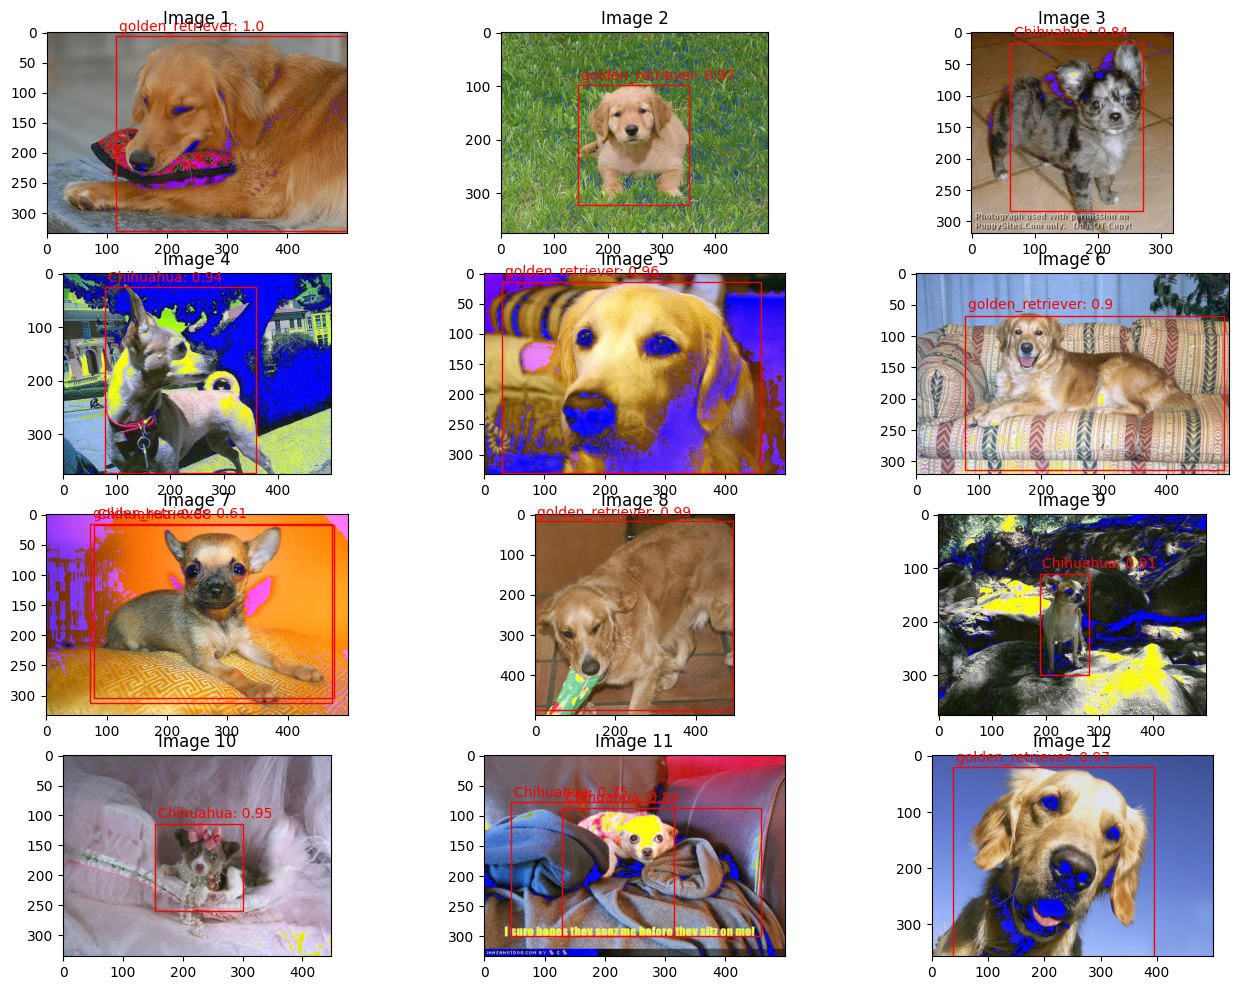

In [ ]:
visualize.plot_prediction_grid(classifier, images, dim=(4, 3), figsize=(16, 12))
